In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
from sklearn import tree
from sklearn.metrics import classification_report 
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [155]:
df=pd.read_csv('F:/diabetes_prediction_dataset.csv')

In [156]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Variable description
#### Gender: 
Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.
#### Age: 
Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.
#### Hypertension:
Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated.
#### Heart Disease: 
Heart disease is another medical condition that is associated with an increased risk of developing diabetes.
#### Smoking History: 
Smoking history is also considered as a risk factor on Diabetes. It represents smoking history of the patient.
#### BMI(Body Mass Index): 
BMI (Body Mass Index) is a measure of body fat based on weight and height. Patients with higher BMI are known for having more risk of suffering from diabetes.
#### bA1c Level: 
HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.
#### Blood Glucose Level:
Blood glucose level refers to the amount of glucose in the bloodstream at a given time.
#### Diabetes:
Represents the patient if he/she has diabetes or not. 0 is negative, 1 is positive.

In [157]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

#### Categorical column: 5
#### Numeric column:4

In [158]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [159]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [161]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [162]:
df.duplicated().sum()

3854

In [163]:
df =df.drop_duplicates(keep="first")

In [164]:
df['diabetes'].groupby(df['gender']) .mean()

gender
Female    0.079183
Male      0.100958
Other     0.000000
Name: diabetes, dtype: float64

In [165]:
df = df[df['gender'] != 'Other']

## Insights and visualization

#### 1.Diabetes based on gender

<AxesSubplot:xlabel='diabetes', ylabel='HbA1c_level'>

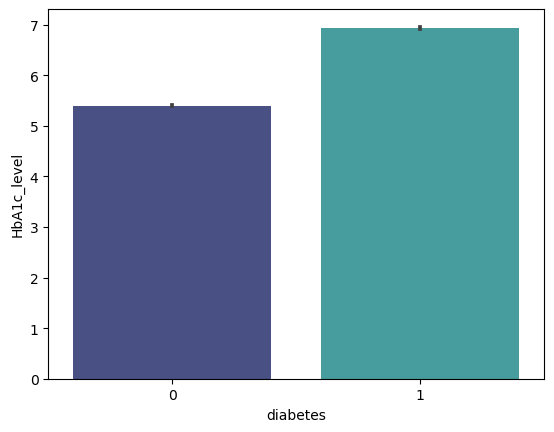

In [166]:
sns.barplot(x='diabetes', y='HbA1c_level', data=df,palette='mako')

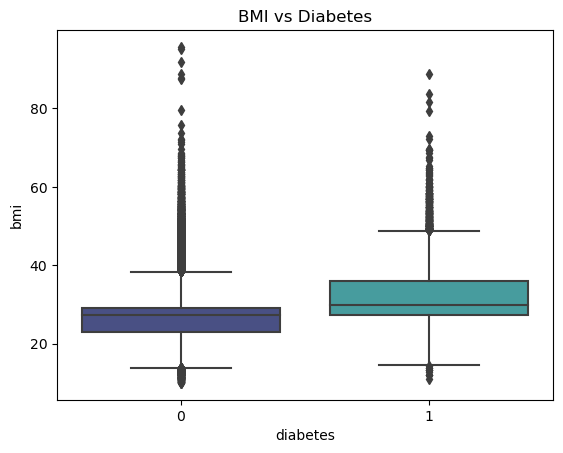

In [167]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df, palette='mako')
plt.title('BMI vs Diabetes')
plt.show()

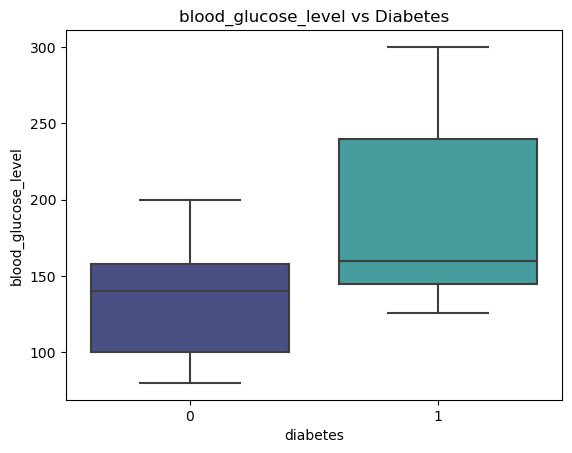

In [168]:

sns.boxplot(x='diabetes', y='blood_glucose_level', data=df,palette='mako')
plt.title('blood_glucose_level vs Diabetes')
plt.show()

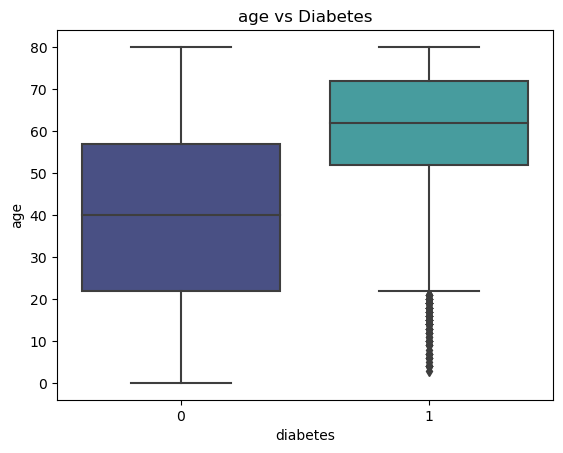

In [169]:
sns.boxplot(x='diabetes', y='age', data=df,palette='mako')
plt.title('age vs Diabetes')
plt.show()

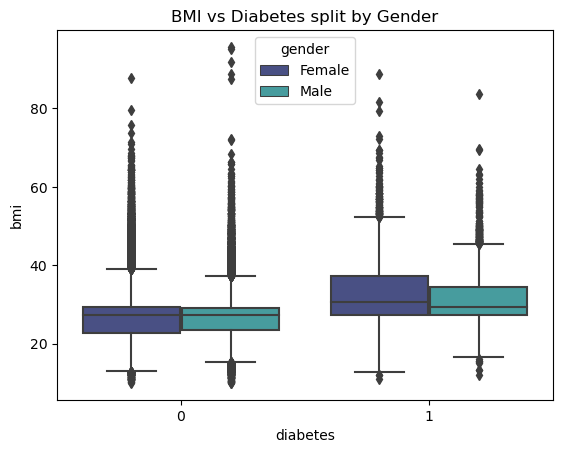

In [170]:
# Violin plot of BMI against diabetes classification split by gender
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df,palette='mako')
plt.title('BMI vs Diabetes split by Gender')
plt.show()

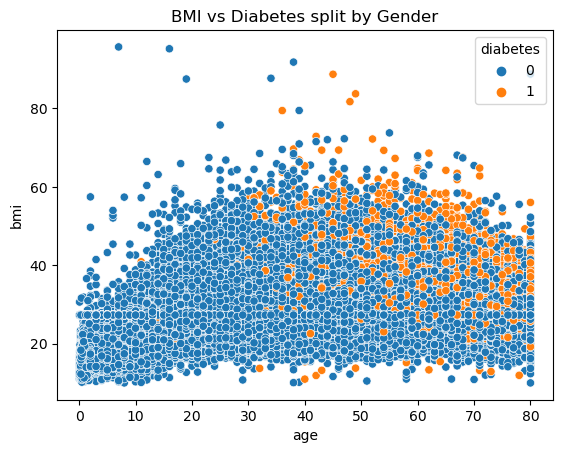

In [171]:
# Violin plot of BMI against diabetes classification split by gender
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

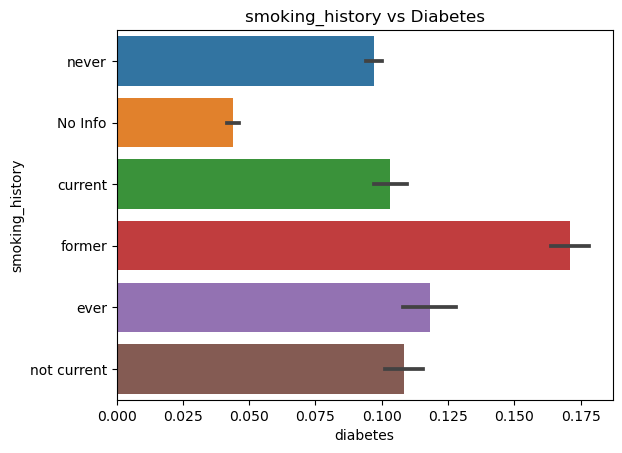

In [172]:
sns.barplot(x='diabetes', y='smoking_history', data=df)
plt.title('smoking_history vs Diabetes')
plt.show()

## Model Building

In [173]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])
#encoder.fit_transform(df['gender'])

In [174]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("diabetes", axis=1), df["diabetes"], test_size=0.2, random_state=42)

In [175]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [176]:
pred = model.predict(X_test)
print(pred)
accuracy = model.score(X_test, y_test)
print(accuracy)

[0 0 0 ... 0 0 0]
0.9694684281701862


In [177]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [178]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.1,
)

In [179]:
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="error",
    early_stopping_rounds=500,
    verbose=10,
)

[0]	validation_0-error:0.03074


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.03074
[20]	validation_0-error:0.03074
[30]	validation_0-error:0.03074
[40]	validation_0-error:0.03074
[50]	validation_0-error:0.03074
[60]	validation_0-error:0.03074
[70]	validation_0-error:0.03074
[80]	validation_0-error:0.03084
[90]	validation_0-error:0.03079
[100]	validation_0-error:0.03079
[110]	validation_0-error:0.03079
[120]	validation_0-error:0.03053
[130]	validation_0-error:0.03048
[140]	validation_0-error:0.03053
[150]	validation_0-error:0.03048
[160]	validation_0-error:0.03043
[170]	validation_0-error:0.03043
[180]	validation_0-error:0.03048
[190]	validation_0-error:0.03043
[200]	validation_0-error:0.03043
[210]	validation_0-error:0.03027
[220]	validation_0-error:0.03022
[230]	validation_0-error:0.03017
[240]	validation_0-error:0.03012
[250]	validation_0-error:0.03012
[260]	validation_0-error:0.03012
[270]	validation_0-error:0.03012
[280]	validation_0-error:0.03017
[290]	validation_0-error:0.03012
[300]	validation_0-error:0.03006
[310]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [180]:
# Model score
print("Model validation accuracy: %.2f%%" % (model.score(X_test, y_test) * 100))

Model validation accuracy: 97.00%
